In [1]:
%run imports/VacuumGauge_functions.ipynb
%run imports/rbflayer.py

import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#machine learning
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

#signal processing
import scipy
from skimage.measure import block_reduce

import warnings
warnings.filterwarnings('ignore')


root_logdir = os.path.join(os.curdir, 'data/logs')

if not(os.path.exists(root_logdir)):
    !mkdir -p {root_logdir}
    print('{} succesfully created.'.format(root_logdir))
else:
    print('{} already exist.'.format(root_logdir))

def get_run_logdir(model_version):
    import time
    run_id = time.strftime('{}_run_%Y_%m_%d-%H_%M_%S'.format(model_version))
    return os.path.join(root_logdir, run_id)

./data/logs already exist.


In [2]:
df_delta = pd.read_csv('data/datasets/df_delta.csv') # cointains labels for delta VG
df_ok = pd.read_csv('data/datasets/df_ok.csv')  #contains labels for ok VG

df_raw = pd.read_csv('data/datasets/df_raw.csv') ## contains full reading of each VG

df_labels = pd.concat([df_ok, df_delta], sort=False, axis=0)


df_VG = pd.merge(df_raw, df_labels, on =['gauge_id','fillNumber'])
df_VG = df_VG.set_index(['gauge_id','fillNumber'], drop=True)

## Removing categorical values
df_VG.y.replace(to_replace=['ok', 'delta'], value=[0, 1], inplace=True)

In [3]:
X = np.array(df_VG.iloc[:, :-1])
y = np.array(df_VG.iloc[:, -1])

In [6]:
X_prep = Prepocess().fit_transform(X)
X_scaled = RowScaler().fit_transform(X_prep)

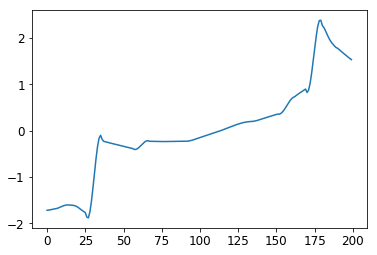

In [46]:
plt.plot(X_scaled[75])
plt.show()

In [53]:
from scipy.signal import find_peaks
x = X_scaled[1]

n_split = 10
def analytcal_preditct(X, n_split=10):
    y_pred = []
    for index, x in enumerate(X):
        splits = np.split(x, n_split)
        fold = np.mean(splits, axis=1)
        peak_index = find_peaks(fold)[0]
        if len(peak_index) == 0:
            last_peak = n_split
        else:
            last_peak = peak_index[-1]
        if last_peak >= n_split/4:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
for n_split in range(4, 30):
    try:
        y_pred = analytcal_preditct(X_scaled, n_split)
    except: # don't just do a bare except!
        pass
    recall = recall_score(y_pred=y_pred, y_true=y)
    precision = precision_score(y_pred=y_pred, y_true=y)
    accuracy = accuracy_score(y_pred=y_pred, y_true=y)
    print('split {:0d}, recall {:.2f}, precision {:.2f}, accuracy {:.2f}'.format(n_split, recall, precision, accuracy))

split 4, recall 1.00, precision 0.50, accuracy 0.50
split 5, recall 0.88, precision 0.72, accuracy 0.77
split 6, recall 0.88, precision 0.72, accuracy 0.77
split 7, recall 0.88, precision 0.72, accuracy 0.77
split 8, recall 0.79, precision 0.54, accuracy 0.56
split 9, recall 0.79, precision 0.54, accuracy 0.56
split 10, recall 0.94, precision 0.66, accuracy 0.73
split 11, recall 0.94, precision 0.66, accuracy 0.73
split 12, recall 0.94, precision 0.66, accuracy 0.73
split 13, recall 0.94, precision 0.66, accuracy 0.73
split 14, recall 0.94, precision 0.66, accuracy 0.73
split 15, recall 0.94, precision 0.66, accuracy 0.73
split 16, recall 0.94, precision 0.66, accuracy 0.73
split 17, recall 0.94, precision 0.66, accuracy 0.73
split 18, recall 0.94, precision 0.66, accuracy 0.73
split 19, recall 0.94, precision 0.66, accuracy 0.73
split 20, recall 0.99, precision 0.59, accuracy 0.65
split 21, recall 0.99, precision 0.59, accuracy 0.65
split 22, recall 0.99, precision 0.59, accuracy 0.65

In [47]:
splits = np.split(X_scaled[75], 10)
fold = np.mean(splits, axis=1)
peak_index = find_peaks(fold)[0]

In [49]:
len(peak_index)

0

In [62]:
y_pred = analytcal_preditct(X_scaled, 10)

In [65]:
index = np.where(y_pred!=y)[0]

0


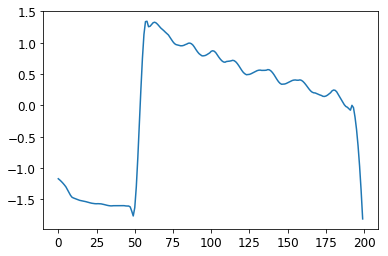

0


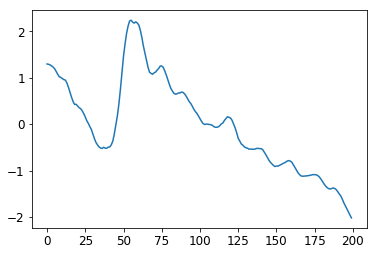

0


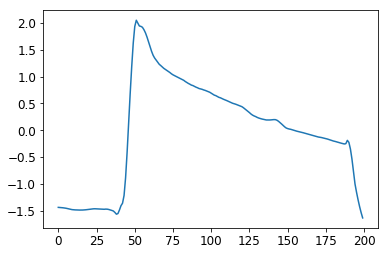

0


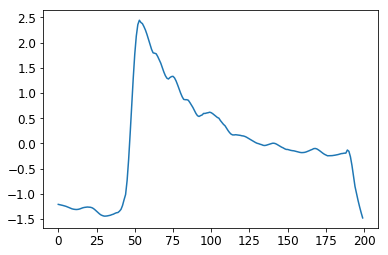

0


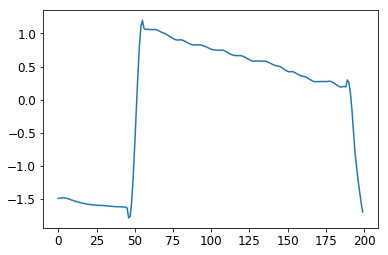

0


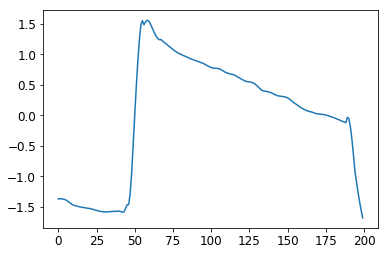

0


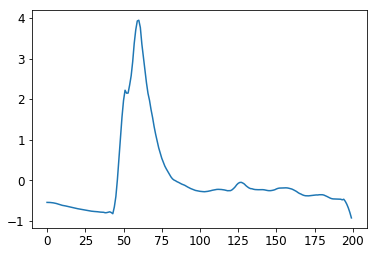

0


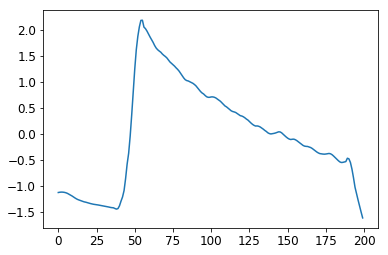

0


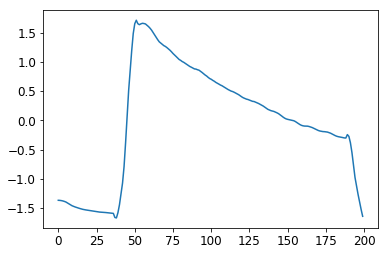

0


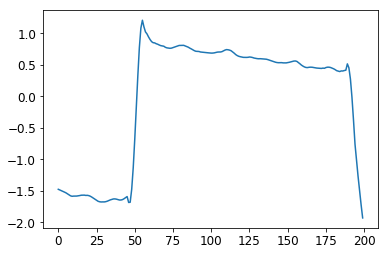

0


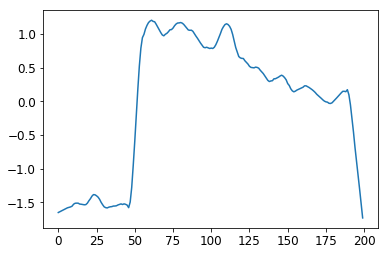

0


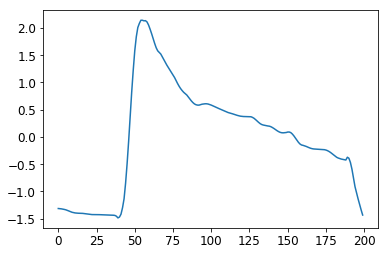

0


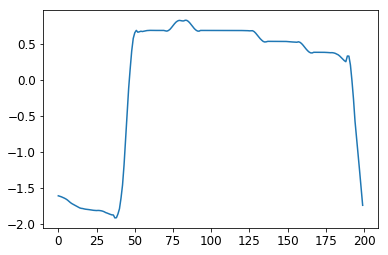

0


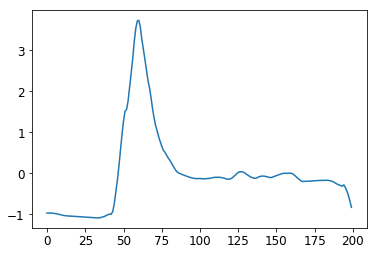

0


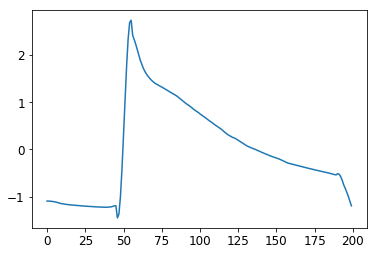

0


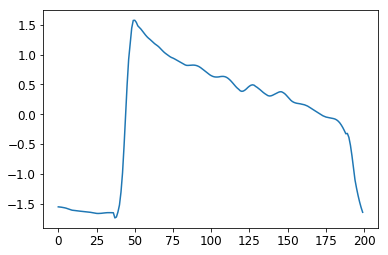

0


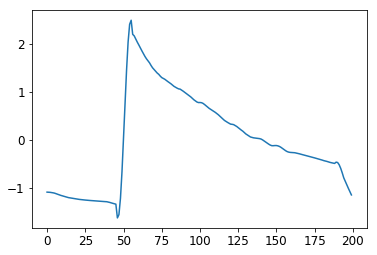

0


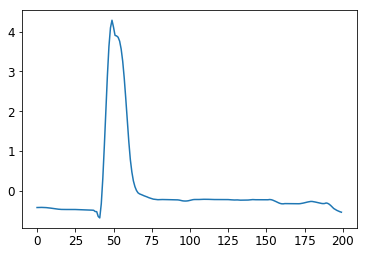

0


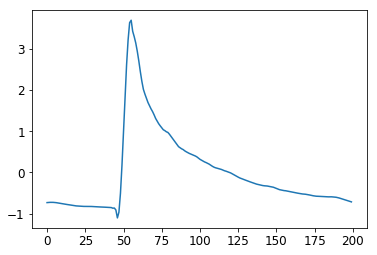

0


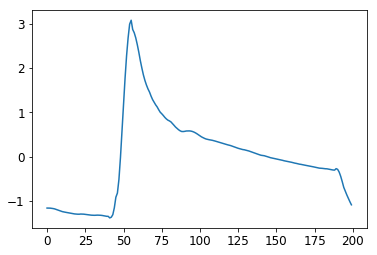

0


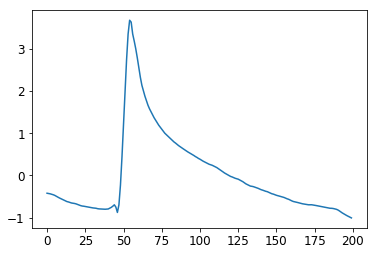

1


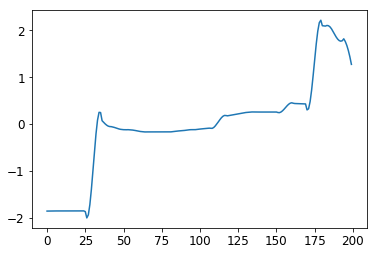

0


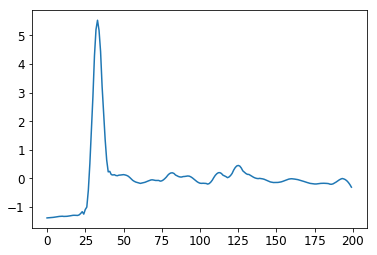

0


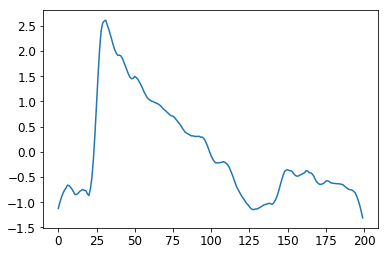

1


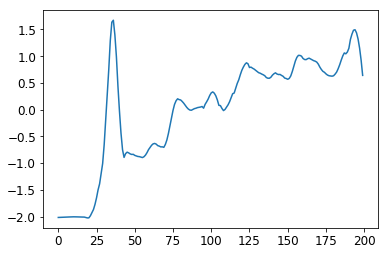

0


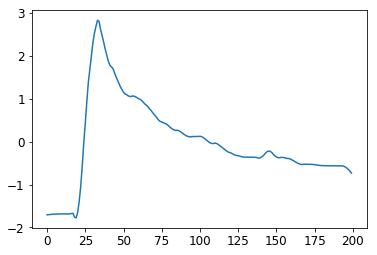

1


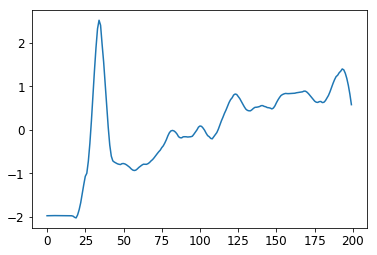

1


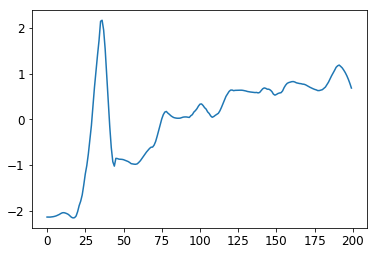

0


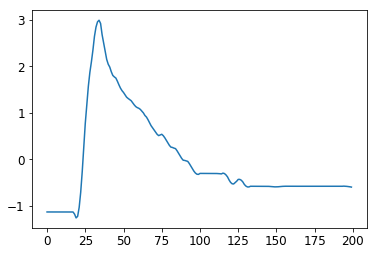

0


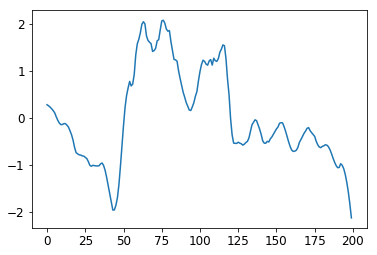

0


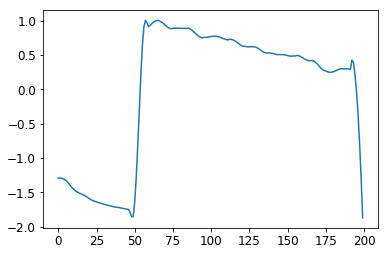

0


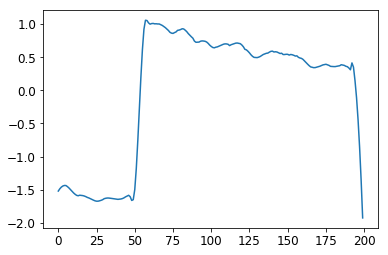

0


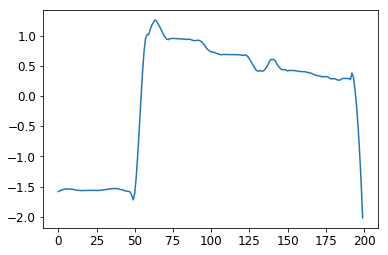

0


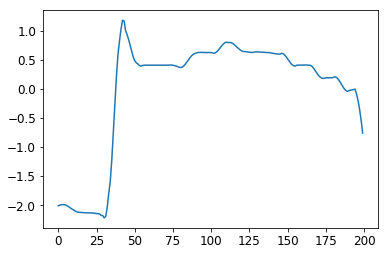

0


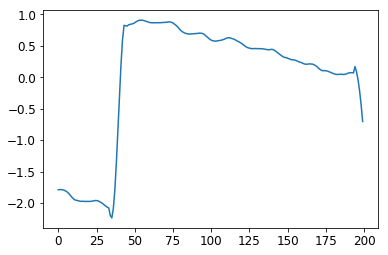

0


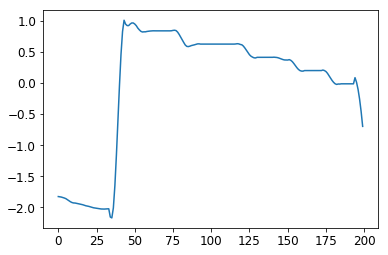

0


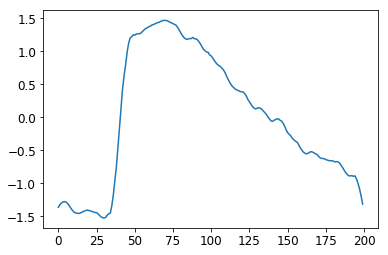

0


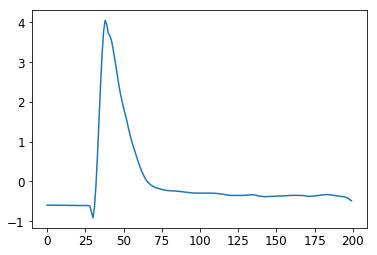

0


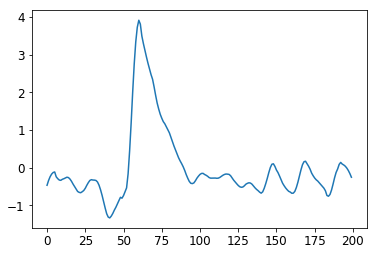

0


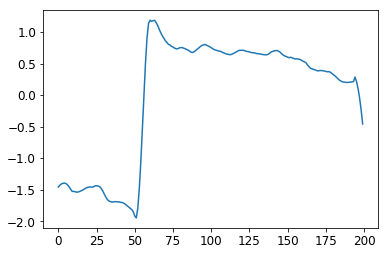

0


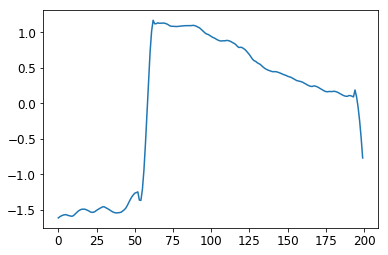

0


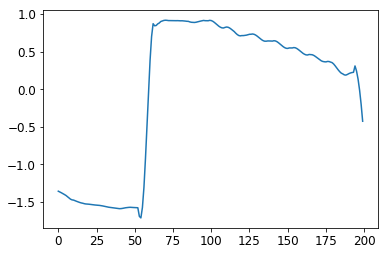

0


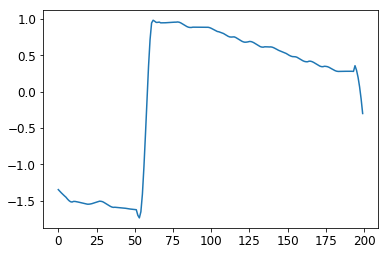

0


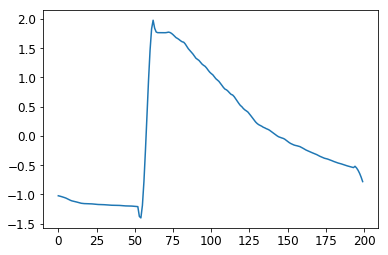

0


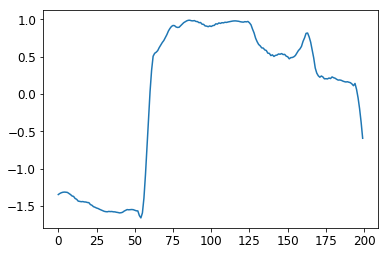

0


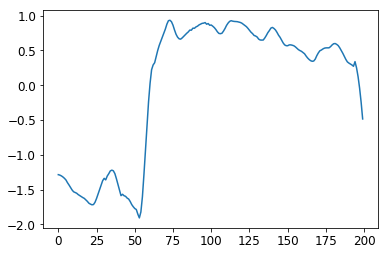

0


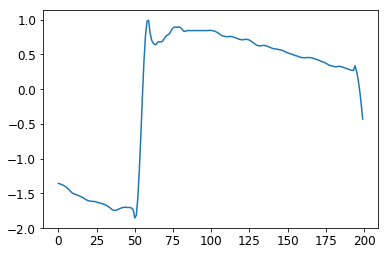

0


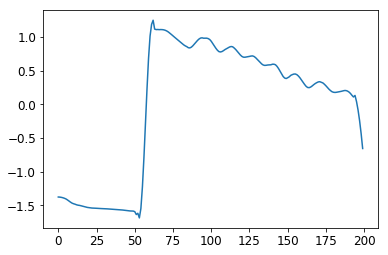

0


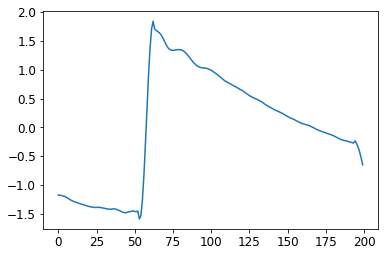

0


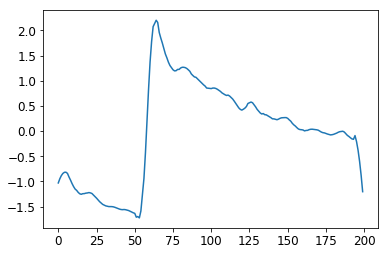

1


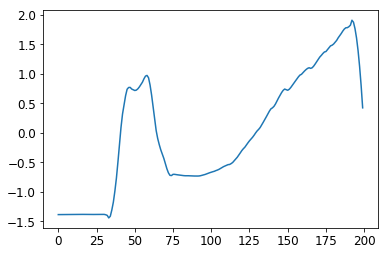

1


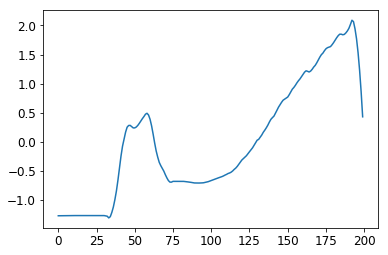

0


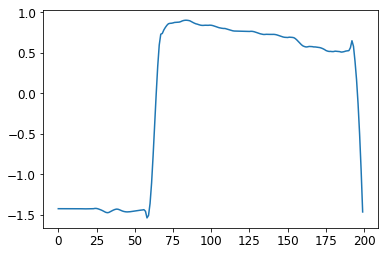

0


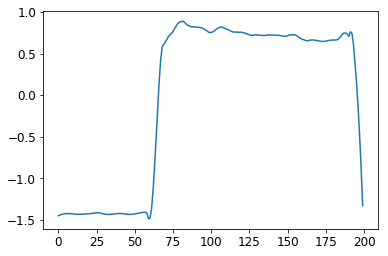

0


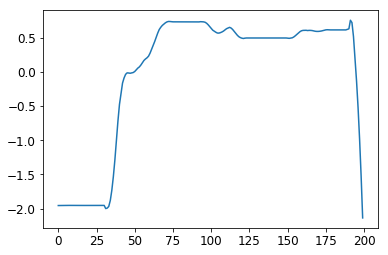

0


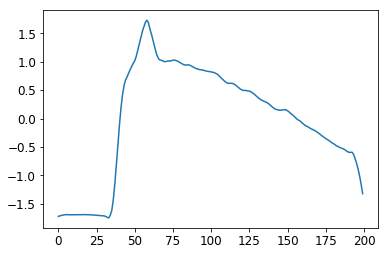

0


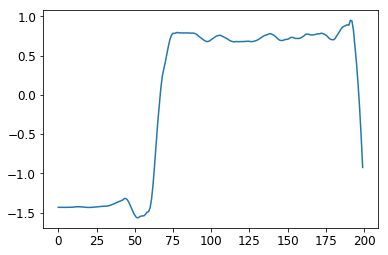

0


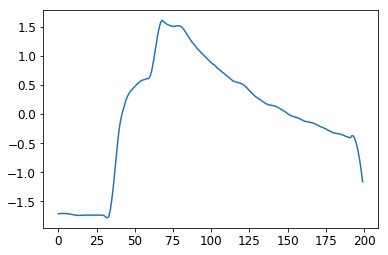

0


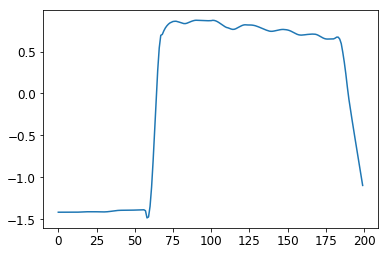

0


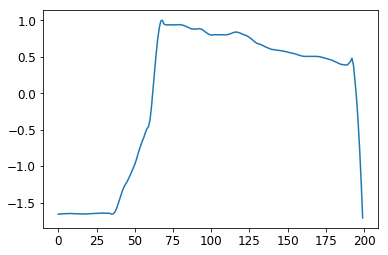

0


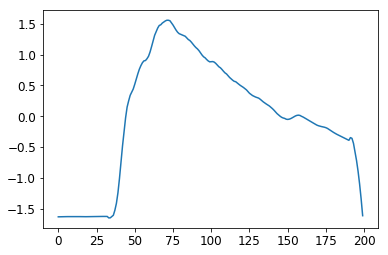

0


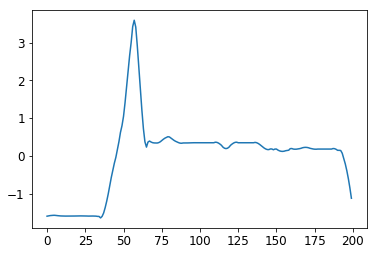

0


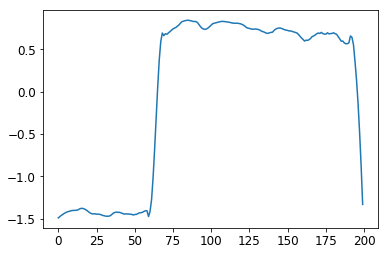

1


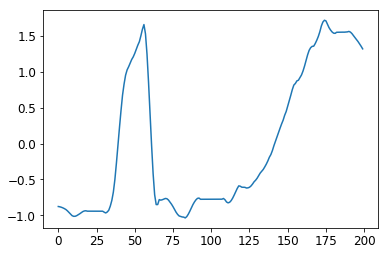

1


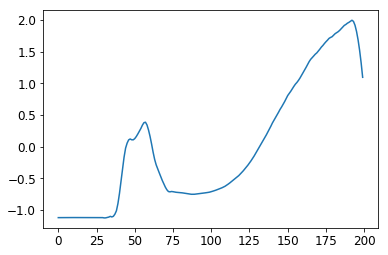

0


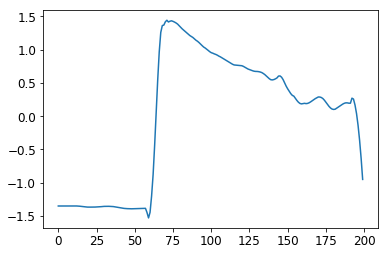

0


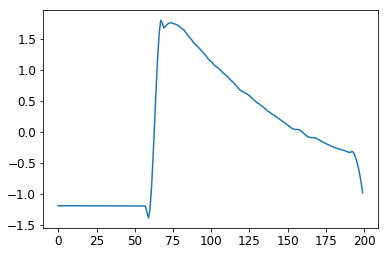

0


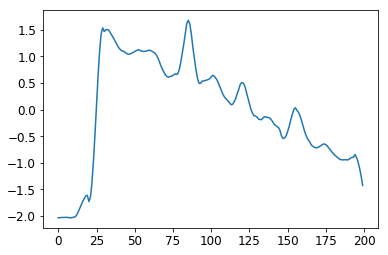

0


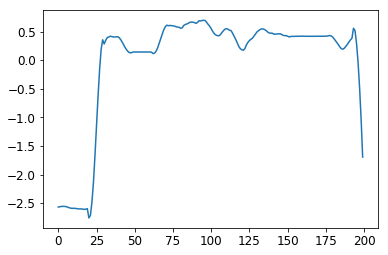

0


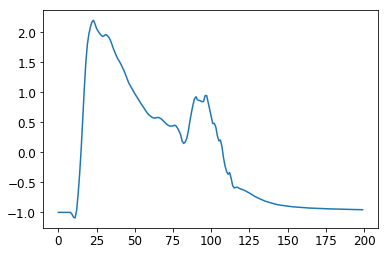

0


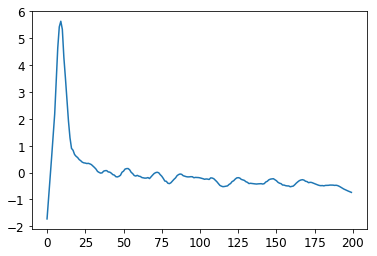

0


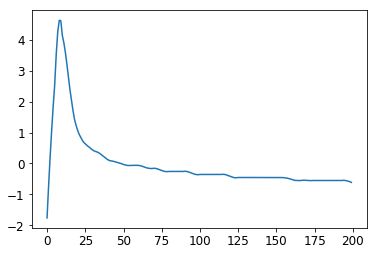

0


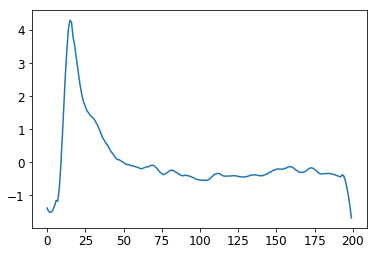

0


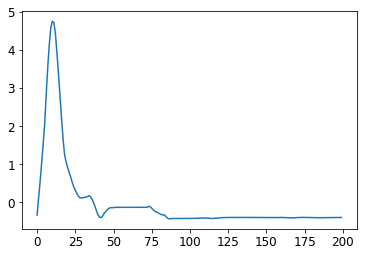

In [67]:
for i in index:
    print(y[i])
    plt.plot(X_scaled[i])
    plt.show()